 What is hypothesis testing in statistics?

Hypothesis testing is a method that helps you decide whether a claim about a population (for example, “the average height is 170 cm”) is supported by sample data or not. You start with a default assumption (the null hypothesis), collect sample data, compute a statistic, and use probability (the sampling distribution) to decide whether the observed data are consistent with that default or so unlikely that you would reject it.

What is the null hypothesis, and how does it differ from the alternative hypothesis?

Null hypothesis (H₀): The default statement or claim we start with (example: H₀: μ = 50). It usually represents “no effect” or “no difference.”

Alternative hypothesis (H₁ or Hₐ): The statement you would accept if evidence contradicts the null (example: H₁: μ ≠ 50). It represents the effect, difference, or change you are testing for.

Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

Significance level (α) is a threshold probability we choose before looking at the data (common choices: 0.05, 0.01). It is the maximum probability of making a Type I error (rejecting H₀ when it is actually true) that we're willing to accept.

After computing the test statistic and p-value, we compare p-value to α:

If p-value ≤ α → reject H₀ (results are “statistically significant”).

If p-value > α → fail to reject H₀ (not enough evidence).

Setting α smaller (e.g., 0.01 instead of 0.05) makes the test more conservative — you require stronger evidence to reject H₀.

What are Type I and Type II errors? Give examples.

Type I error (false positive): Rejecting H₀ when it is actually true.
Example: A medicine is actually ineffective, but the test concludes it works (you approve a useless drug).

Type II error (false negative): Failing to reject H₀ when H₁ is actually true.
Example: A medicine truly helps patients, but your study fails to detect the effect, so you conclude it doesn't work.

Trade-off: lowering α reduces Type I errors but can increase Type II errors unless you increase sample size.

Difference between a Z-test and a T-test — when to use each

Z-test: Used when the population standard deviation (σ) is known or sample size is large enough that σ can be approximated well by the sample standard deviation. Z uses the normal (Z) distribution for the test statistic.
Use when: σ known or n is large (rule of thumb n ≥ 30 can let normal approximations work).

T-test: Used when the population standard deviation is unknown and the sample is small; it uses Student’s t-distribution which has heavier tails (accounts for extra uncertainty from estimating σ).
Use when: σ unknown and sample size is small; use t-distribution with n−1 degrees of freedom.

In short: t-test is safer when σ is unknown; z-test is appropriate when σ is known or sample size is large.

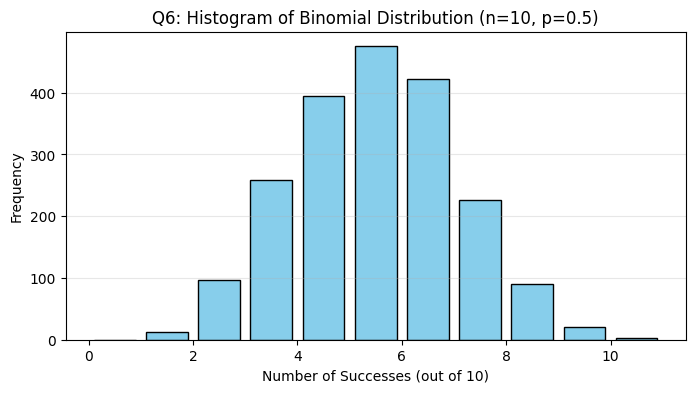

In [1]:
# Q6: Binomial Distribution
# -------------------------

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility (so you get same result every time)
np.random.seed(42)

# Define parameters for the binomial distribution
n = 10          # number of trials
p = 0.5         # probability of success in each trial
num_experiments = 2000   # total number of samples to generate

# Generate random samples from a Binomial distribution
binom_samples = np.random.binomial(n, p, size=num_experiments)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(binom_samples, bins=range(0, n + 2), rwidth=0.8, color='skyblue',
         edgecolor='black')
plt.title("Q6: Histogram of Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes (out of 10)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [4]:
# Q7: One-sample Z-Test (Corrected)
# ---------------------------------

import numpy as np
import math
from math import sqrt

# Given sample data
sample_data = [
    49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
    50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
    50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
    50.3, 50.4, 50.0, 49.7, 50.5, 49.9
]

# Step 1: Define hypotheses
mu0 = 50.0            # H0: population mean
sigma_pop = 1.0       # population standard deviation (known)
alpha = 0.05          # significance level

# Step 2: Sample statistics
xbar = np.mean(sample_data)
n = len(sample_data)

# Step 3: Calculate Z-statistic
z_stat = (xbar - mu0) / (sigma_pop / sqrt(n))

# Step 4: Calculate two-tailed p-value using math.erf()
p_value = 2 * (1 - (0.5 * (1 + math.erf(abs(z_stat) / math.sqrt(2)))))

# Step 5: Display results
print("----- Q7: One-sample Z-Test -----")
print(f"Sample mean = {xbar:.4f}")
print(f"Sample size (n) = {n}")
print(f"Population standard deviation (σ) = {sigma_pop}")
print(f"Z-statistic = {z_stat:.4f}")
print(f"P-value (two-tailed) = {p_value:.4f}")

if p_value < alpha:
    print("Decision: Reject H0 (significant difference detected)")
else:
    print("Decision: Fail to reject H0 (no significant difference)")
print("---------------------------------")


----- Q7: One-sample Z-Test -----
Sample mean = 50.0889
Sample size (n) = 36
Population standard deviation (σ) = 1.0
Z-statistic = 0.5333
P-value (two-tailed) = 0.5938
Decision: Fail to reject H0 (no significant difference)
---------------------------------


----- Q8: 95% Confidence Interval for Mean -----
Sample size (n)       = 100
Simulated sample mean = 10.0813
Sample SD (ddof=1)    = 3.4018
Standard Error (SE)   = 0.3402
Critical value used   = 1.9842 (t-critical)
95% CI                = (9.4063, 10.7563)
-----------------------------------------------


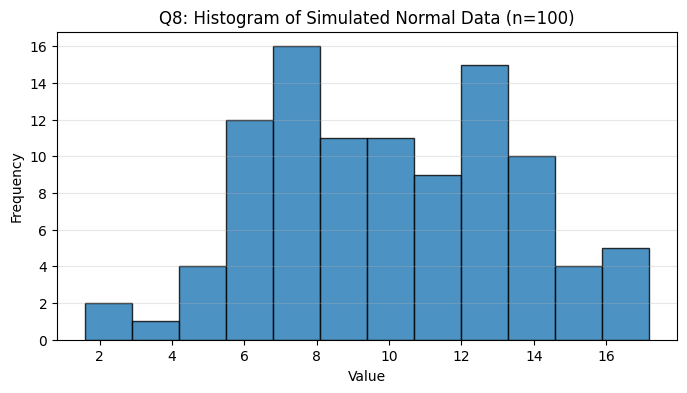

In [5]:
# Q8: 95% Confidence Interval for the Mean (Simulated Data)
# --------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Try to import scipy for exact t-critical; if not available, fallback to z-critical 1.96
try:
    from scipy import stats
    SCIPY_AVAILABLE = True
except Exception:
    SCIPY_AVAILABLE = False

# --- Simulation parameters ---
np.random.seed(123)      # reproducible results
sim_n = 100              # sample size
true_mu = 10.0           # true mean used for simulation
true_sigma = 3.0         # true population sd used for simulation

# --- Generate simulated data ---
sim_data = np.random.normal(loc=true_mu, scale=true_sigma, size=sim_n)

# --- Sample statistics ---
sim_mean = np.mean(sim_data)
sim_sd = np.std(sim_data, ddof=1)      # sample standard deviation (ddof=1)
se = sim_sd / sqrt(sim_n)             # standard error of the mean

# --- Critical value for 95% CI ---
alpha = 0.05
if SCIPY_AVAILABLE:
    # exact t-critical for (1 - alpha/2) with df = n-1
    t_crit = stats.t.ppf(1 - alpha/2, df=sim_n - 1)
else:
    # for n = 100, z ≈ t; use 1.96 as a good approximation
    t_crit = 1.96

# --- Confidence interval ---
ci_lower = sim_mean - t_crit * se
ci_upper = sim_mean + t_crit * se

# --- Print results ---
print("----- Q8: 95% Confidence Interval for Mean -----")
print(f"Sample size (n)       = {sim_n}")
print(f"Simulated sample mean = {sim_mean:.4f}")
print(f"Sample SD (ddof=1)    = {sim_sd:.4f}")
print(f"Standard Error (SE)   = {se:.4f}")
print(f"Critical value used   = {t_crit:.4f} ({'t' if SCIPY_AVAILABLE else 'z
(approx)'}-critical)")
print(f"95% CI                = ({ci_lower:.4f}, {ci_upper:.4f})")
print("-----------------------------------------------")

# --- Histogram of the simulated data ---
plt.figure(figsize=(8, 4))
plt.hist(sim_data, bins=12, edgecolor='black', alpha=0.8)
plt.title("Q8: Histogram of Simulated Normal Data (n=100)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


----- Q9: Z-score Summary -----
Original Mean = 50.0889
Original Population SD = 0.5290
Mean of Z-scores ≈ 0.0000
SD of Z-scores ≈ 1.0000
--------------------------------


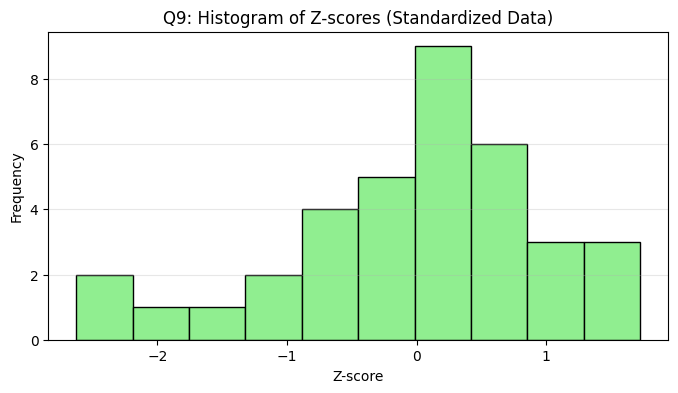

In [7]:
# Q9: Calculate Z-scores and plot histogram
# -----------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Use the same sample data from previous question
sample_data = [
    49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
    50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
    50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
    50.3, 50.4, 50.0, 49.7, 50.5, 49.9
]

# Function to calculate Z-scores
def compute_z_scores(data):
    arr = np.array(data)
    mean = np.mean(arr)
    std_pop = np.std(arr, ddof=0)   # population standard deviation
    z_scores = (arr - mean) / std_pop
    return z_scores, mean, std_pop

# Compute z-scores
z_scores, orig_mean, orig_std = compute_z_scores(sample_data)

# Print basic results
print("----- Q9: Z-score Summary -----")
print(f"Original Mean = {orig_mean:.4f}")
print(f"Original Population SD = {orig_std:.4f}")
print(f"Mean of Z-scores ≈ {np.mean(z_scores):.4f}")
print(f"SD of Z-scores ≈ {np.std(z_scores, ddof=0):.4f}")
print("--------------------------------")

# Plot histogram of Z-scores
plt.figure(figsize=(8, 4))
plt.hist(z_scores, bins=10, color='lightgreen', edgecolor='black')
plt.title("Q9: Histogram of Z-scores (Standardized Data)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()
